## HW5

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mode
from datetime import datetime, timedelta
import datetime as dt
%matplotlib inline

In [2]:
mydata = pd.read_csv('card transactions.csv').iloc[:,0:10]
mydata.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,1/1/10,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,2,5142183973,1/1/10,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,1/1/10,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
3,4,5142148452,1/1/10,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
4,5,5142190439,1/1/10,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0


In [3]:
mydata.shape

(96753, 10)

#### Remove outliers

<AxesSubplot:xlabel='Amount'>

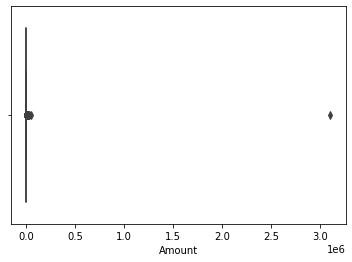

In [4]:
sns.boxplot(x='Amount', data=mydata)

In [5]:
outlier = mydata[mydata.Amount > 100000].Recnum

In [6]:
# removed 1 row
data_NoOutlier = mydata[~mydata.Recnum.isin(outlier)].copy().reset_index().iloc[:,1:]
data_NoOutlier

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,1/1/10,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,2,5142183973,1/1/10,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,1/1/10,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
3,4,5142148452,1/1/10,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
4,5,5142190439,1/1/10,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
...,...,...,...,...,...,...,...,...,...,...
96747,96749,5142276053,12/31/10,3500000006160,BEST BUY 00001610,KY,41042.0,P,84.79,0
96748,96750,5142225701,12/31/10,8090710030950,MARKUS OFFICE SUPPLIES,OH,45248.0,P,118.75,0
96749,96751,5142226486,12/31/10,4503057341100,"TECH PAC, INC",OH,45150.0,P,363.56,0
96750,96752,5142244619,12/31/10,8834000695412,BUY.COM,CA,92656.0,P,2202.03,0


### Remove all but the "P" type transactions

In [7]:
data_NoOutlier['Transtype'].value_counts()

P    96397
A      181
D      173
Y        1
Name: Transtype, dtype: int64

In [8]:
# removed 355 rows
data = data_NoOutlier[data_NoOutlier.Transtype == 'P'].copy().reset_index().iloc[:,1:]
data

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,1/1/10,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,2,5142183973,1/1/10,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,1/1/10,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
3,4,5142148452,1/1/10,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
4,5,5142190439,1/1/10,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
...,...,...,...,...,...,...,...,...,...,...
96392,96749,5142276053,12/31/10,3500000006160,BEST BUY 00001610,KY,41042.0,P,84.79,0
96393,96750,5142225701,12/31/10,8090710030950,MARKUS OFFICE SUPPLIES,OH,45248.0,P,118.75,0
96394,96751,5142226486,12/31/10,4503057341100,"TECH PAC, INC",OH,45150.0,P,363.56,0
96395,96752,5142244619,12/31/10,8834000695412,BUY.COM,CA,92656.0,P,2202.03,0


### Fill in missing Merchnum

In [9]:
missing_state = np.where(pd.isnull(data['Merchnum']))[0]
len(missing_state)

3198

In [10]:
sum(data.Merchnum == '0')

53

In [11]:
merchdes_merchnum = {}
for index, merchdes in data[data['Merch description'].notnull()]['Merch description'].items():
    if merchdes not in merchdes_merchnum:
        merchdes_merchnum[merchdes] = data.loc[index, 'Merchnum']
        
# fill in by mapping with Merch description
data['Merchnum'] = data['Merchnum'].fillna(data['Merch description'].map(merchdes_merchnum))

# assign unknown for adjustments transactions
data['Merchnum'] = data['Merchnum'].mask(data['Merch description'] == 'RETAIL CREDIT ADJUSTMENT', 'unknown')
data['Merchnum'] = data['Merchnum'].mask(data['Merch description'] == 'RETAIL DEBIT ADJUSTMENT', 'unknown')

In [12]:
sum(data.Merchnum == '0')

56

In [13]:
missing_state = np.where(pd.isnull(data['Merchnum']))[0]
len(missing_state)

2215

### Fill in missing Merch state

In [14]:
missing_zips = np.where(pd.isnull(data['Merch state']))[0]
len(missing_zips)

1020

In [15]:
# dict for mapping
zip_state = {}
for index, zip5 in data[data['Merch zip'].notnull()]['Merch zip'].items():
    if zip5 not in zip_state:
        zip_state[zip5] = data.loc[index, 'Merch state']
        
zip_state['00926'] = 'PR'
zip_state['00929'] = 'PR'
zip_state['00934'] = 'PR'
zip_state['00902'] = 'PR'
zip_state['00738'] = 'PR'
zip_state['90805'] = 'CA'
zip_state['76302'] = 'TX'
zip_state['00914'] = 'PR'
zip_state['95461'] = 'CA'
zip_state['00680'] = 'PR'
zip_state['00623'] = 'PR'
zip_state['00726'] = 'PR'
zip_state['00936'] = 'PR'
zip_state['12108'] = 'NY'
zip_state['00791'] = 'PR'
zip_state['00907'] = 'PR'
zip_state['00922'] = 'PR'
zip_state['00920'] = 'PR'
zip_state['00801'] = 'VI'
zip_state['31040'] = 'GA'
zip_state['41160'] = 'KY'
zip_state['00681'] = 'PR'

merchnum_state = {}
for index, merchnum in data[data['Merchnum'].notnull()]['Merchnum'].items():
    if merchnum not in merchnum_state :
        merchnum_state [merchnum] = data.loc[index, 'Merch state']

merchdes_state = {}
for index, merchdes in data[data['Merch description'].notnull()]['Merch description'].items():
    if merchdes not in merchdes_state :
        merchdes_state [merchdes] = data.loc[index, 'Merch state']

# fill in by mapping with zip, merchnum and merch description
data['Merch state'] = data['Merch state'].fillna(data['Merch zip'].map(zip_state))
data['Merch state'] = data['Merch state'].fillna(data['Merchnum'].map(merchnum_state))
data['Merch state'] = data['Merch state'].fillna(data['Merch description'].map(merchdes_state))

# assign unknown for adjustments transactions
data['Merch state'] = data['Merch state'].mask(data['Merch description'] == 'RETAIL CREDIT ADJUSTMENT', 'unknown')
data['Merch state'] = data['Merch state'].mask(data['Merch description'] == 'RETAIL DEBIT ADJUSTMENT', 'unknown')

In [16]:
len(np.where(pd.isnull(data['Merch state']))[0])

315

### Fill in missing ZIP

In [17]:
merchnum_zip = {}
for index, merchnum in data[data['Merchnum'].notnull()]['Merchnum'].items():
    if merchnum not in merchnum_zip :
        merchnum_zip [merchnum] = data.loc[index, 'Merch zip']

merchdes_zip = {}
for index, merchdes in data[data['Merch description'].notnull()]['Merch description'].items():
    if merchdes not in merchdes_zip :
        merchdes_zip [merchdes] = data.loc[index, 'Merch zip']

# fill in by mapping with merchnum and merch description
data['Merch zip'] = data['Merch zip'].fillna(data['Merchnum'].map(merchnum_zip))
data['Merch zip'] = data['Merch zip'].fillna(data['Merch description'].map(merchdes_zip))

# assign unknown for adjustments transactions
data['Merch zip'] = data['Merch zip'].mask(data['Merch zip'] == 'RETAIL CREDIT ADJUSTMENT', 'unknown')
data['Merch zip'] = data['Merch zip'].mask(data['Merch zip'] == 'RETAIL DEBIT ADJUSTMENT', 'unknown')

# fill the rest with unknown
data = data.fillna('unknown')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96397 entries, 0 to 96396
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Recnum             96397 non-null  int64  
 1   Cardnum            96397 non-null  int64  
 2   Date               96397 non-null  object 
 3   Merchnum           96397 non-null  object 
 4   Merch description  96397 non-null  object 
 5   Merch state        96397 non-null  object 
 6   Merch zip          96397 non-null  object 
 7   Transtype          96397 non-null  object 
 8   Amount             96397 non-null  float64
 9   Fraud              96397 non-null  int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 7.4+ MB


In [18]:
data

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,1/1/10,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,2,5142183973,1/1/10,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,1/1/10,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
3,4,5142148452,1/1/10,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
4,5,5142190439,1/1/10,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
...,...,...,...,...,...,...,...,...,...,...
96392,96749,5142276053,12/31/10,3500000006160,BEST BUY 00001610,KY,41042.0,P,84.79,0
96393,96750,5142225701,12/31/10,8090710030950,MARKUS OFFICE SUPPLIES,OH,45248.0,P,118.75,0
96394,96751,5142226486,12/31/10,4503057341100,"TECH PAC, INC",OH,45150.0,P,363.56,0
96395,96752,5142244619,12/31/10,8834000695412,BUY.COM,CA,92656.0,P,2202.03,0


In [19]:
#data.to_csv("HW5_cleaned_df.csv")

### Create Variables

#### Create Entities

In [20]:
df = data.copy()

# change 'Cardnum' to string
df.Cardnum = df.Cardnum.astype('str')
df['Merch zip'] = df['Merch zip'].astype('str')

# Create Entities
df['card_merchnum'] = df['Cardnum'] + df['Merchnum']
df['card_zip'] = df['Cardnum'] + df['Merch zip']
df['card_state'] = df['Cardnum'] + df['Merch state']
df['merchnum_zip'] = df['Merchnum'] + df['Merch zip']
df['merchnum_state'] = df['Merchnum'] + df['Merch state']

df.Date = pd.to_datetime(df.Date)
df_check = df.copy()
final = df.copy()
df_check['check_date'] = df.Date
df_check['check_record'] = df.Recnum
df_check

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,card_merchnum,card_zip,card_state,merchnum_zip,merchnum_state,check_date,check_record
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,51421904395509006296254,514219043938118.0,5142190439TN,550900629625438118.0,5509006296254TN,2010-01-01,1
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0,514218397361003026333,51421839731803.0,5142183973MA,610030263331803.0,61003026333MA,2010-01-01,2
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0,51421317214503082993600,514213172120706.0,5142131721MD,450308299360020706.0,4503082993600MD,2010-01-01,3
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0,51421484525509006296254,514214845238118.0,5142148452TN,550900629625438118.0,5509006296254TN,2010-01-01,4
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,51421904395509006296254,514219043938118.0,5142190439TN,550900629625438118.0,5509006296254TN,2010-01-01,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96392,96749,5142276053,2010-12-31,3500000006160,BEST BUY 00001610,KY,41042.0,P,84.79,0,51422760533500000006160,514227605341042.0,5142276053KY,350000000616041042.0,3500000006160KY,2010-12-31,96749
96393,96750,5142225701,2010-12-31,8090710030950,MARKUS OFFICE SUPPLIES,OH,45248.0,P,118.75,0,51422257018090710030950,514222570145248.0,5142225701OH,809071003095045248.0,8090710030950OH,2010-12-31,96750
96394,96751,5142226486,2010-12-31,4503057341100,"TECH PAC, INC",OH,45150.0,P,363.56,0,51422264864503057341100,514222648645150.0,5142226486OH,450305734110045150.0,4503057341100OH,2010-12-31,96751
96395,96752,5142244619,2010-12-31,8834000695412,BUY.COM,CA,92656.0,P,2202.03,0,51422446198834000695412,514224461992656.0,5142244619CA,883400069541292656.0,8834000695412CA,2010-12-31,96752


#### Create Day-since, Frequency & Amount Variables

In [21]:
entities = ["Cardnum", "Merchnum", "card_merchnum", "card_zip", "card_state", "Merch zip", "Merch state"]

for entity in entities:
    df_I = df_check[["Recnum", "Date", entity]]
    df_r = df_check[["check_record", "check_date", entity, "Amount"]]
    temp = pd.merge(df_I, df_r, left_on = entity, right_on = entity)
    
    # Day-since Variables
    temp1 = temp[temp.Recnum > temp.check_record][["Recnum", "Date", "check_date"]].groupby("Recnum")[["Date", "check_date"]].last()
    mapper = (temp1.Date - temp1.check_date).dt.days
    final[entity + '_day_since'] = final.Recnum.map(mapper)
    final[entity + '_day_since'].fillna((final.Date - pd.to_datetime('2010-01-01')).dt.days, inplace = True)
    print('\n' + entity + '_day_since ---> DONE')
    for time in [0, 1, 3, 7, 14, 30]:
        temp2 = temp[(temp.check_date >= (temp.Date - dt.timedelta(time))) & (temp.Recnum >= temp.check_record)][["Recnum", entity, "Amount"]]
        
        # Frequency Variables
        col_name = entity + '_count_' + str(time)
        mapper2 = temp2.groupby("Recnum")[entity].count()
        final[col_name] = final.Recnum.map(mapper2)
        print(col_name + '---> DONE')
        
        # Amount Variables
        final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby("Recnum")["Amount"].mean())
        final[entity + '_max_' + str(time)] = final.Recnum.map(temp2.groupby("Recnum")["Amount"].max())
        final[entity + '_med_' + str(time)] = final.Recnum.map(temp2.groupby("Recnum")["Amount"].median())
        final[entity + '_total_' + str(time)] = final.Recnum.map(temp2.groupby("Recnum")["Amount"].sum())
        final[entity + '_actual/avg_' + str(time)] = final["Amount"] / final[entity + '_avg_' + str(time)]
        final[entity + '_actual/max_' + str(time)] = final["Amount"] / final[entity + '_max_' + str(time)]
        final[entity + '_actual/med_' + str(time)] = final["Amount"] / final[entity + '_med_' + str(time)]
        final[entity + '_actual/total_' + str(time)] = final["Amount"] / final[entity + '_total_' + str(time)]
        print(entity + ' amount variables over past ' + str(time) + '---> DONE')
print("complete")


Cardnum_day_since ---> DONE
Cardnum_count_0---> DONE
Cardnum amount variables over past 0---> DONE
Cardnum_count_1---> DONE
Cardnum amount variables over past 1---> DONE
Cardnum_count_3---> DONE
Cardnum amount variables over past 3---> DONE
Cardnum_count_7---> DONE
Cardnum amount variables over past 7---> DONE
Cardnum_count_14---> DONE
Cardnum amount variables over past 14---> DONE
Cardnum_count_30---> DONE
Cardnum amount variables over past 30---> DONE

Merchnum_day_since ---> DONE
Merchnum_count_0---> DONE
Merchnum amount variables over past 0---> DONE
Merchnum_count_1---> DONE
Merchnum amount variables over past 1---> DONE
Merchnum_count_3---> DONE
Merchnum amount variables over past 3---> DONE
Merchnum_count_7---> DONE
Merchnum amount variables over past 7---> DONE
Merchnum_count_14---> DONE
Merchnum amount variables over past 14---> DONE
Merchnum_count_30---> DONE
Merchnum amount variables over past 30---> DONE

card_merchnum_day_since ---> DONE
card_merchnum_count_0---> DONE
car

In [22]:
final.shape

(96397, 290)

In [23]:
# velocity change variables
for ent in entities:
    for d in ['0', '1']:
        for dd in ['7', '14', '30']:
            final[ent + '_count_' + d + '_by_' + dd] = final[ent + '_count_' + d] / (final[ent + '_count_' + dd]) / float(dd)
            final[ent + '_amount_' + d + '_by_' + dd] = final[ent + '_total_' + d] / (final[ent + '_total_' + dd]) / float(dd)

In [24]:
final.shape

(96397, 350)

In [25]:
final.describe().T

,count,mean,std,min,25%,50%,75%,max
Recnum,96397.0,48365.481820,27945.003883,1.000000,24154.000000,48365.000000,72578.000000,96753.000000
Amount,96397.0,395.858494,832.330197,0.010000,33.460000,137.980000,428.250000,47900.000000
Fraud,96397.0,0.010986,0.104236,0.000000,0.000000,0.000000,0.000000,1.000000
Cardnum_day_since,96397.0,5.419857,17.187933,0.000000,0.000000,1.000000,5.000000,356.000000
Cardnum_count_0,96397.0,2.473656,6.002116,1.000000,1.000000,1.000000,2.000000,146.000000
...,...,...,...,...,...,...,...,...
card_state_amount_1_by_7,96397.0,0.114839,0.045177,0.000010,0.090783,0.142857,0.142857,0.142857
card_state_count_1_by_14,96397.0,0.050471,0.023608,0.000189,0.028571,0.071429,0.071429,0.071429
card_state_amount_1_by_14,96397.0,0.050024,0.026196,0.000005,0.024137,0.071429,0.071429,0.071429
card_state_count_1_by_30,96397.0,0.019486,0.011936,0.000079,0.008333,0.016667,0.033333,0.033333


#### Include two target encoded variables

In [26]:
final_target_encode = final.copy()
final_target_encode = final_target_encode[(final_target_encode.Date >= "2010-01-01") & (final_target_encode.Date <= "2010-08-31")]
final_target_encode

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,...,card_state_count_0_by_14,card_state_amount_0_by_14,card_state_count_0_by_30,card_state_amount_0_by_30,card_state_count_1_by_7,card_state_amount_1_by_7,card_state_count_1_by_14,card_state_amount_1_by_14,card_state_count_1_by_30,card_state_amount_1_by_30
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,...,0.071429,0.071429,0.033333,0.033333,0.142857,0.142857,0.071429,0.071429,0.033333,0.033333
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0,...,0.071429,0.071429,0.033333,0.033333,0.142857,0.142857,0.071429,0.071429,0.033333,0.033333
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0,...,0.071429,0.071429,0.033333,0.033333,0.142857,0.142857,0.071429,0.071429,0.033333,0.033333
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0,...,0.071429,0.071429,0.033333,0.033333,0.142857,0.142857,0.071429,0.071429,0.033333,0.033333
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,...,0.071429,0.071429,0.033333,0.033333,0.142857,0.142857,0.071429,0.071429,0.033333,0.033333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69041,69291,5142196230,2010-08-31,720306361800,HEALTH EFFECTS INSTITUTE,MA,2139.0,P,340.00,0,...,0.071429,0.071429,0.033333,0.033333,0.142857,0.142857,0.071429,0.071429,0.033333,0.033333
69042,69292,5142211054,2010-08-31,6170023382,THOMAS SCIENTIFIC,NJ,8085.0,P,133.00,0,...,0.071429,0.071429,0.033333,0.033333,0.142857,0.142857,0.071429,0.071429,0.033333,0.033333
69043,69293,5142225264,2010-08-31,8915900690006,GLOBAL COMPUTER SUPPLY,IL,60540.0,P,170.00,0,...,0.071429,0.071429,0.004762,0.004909,0.142857,0.142857,0.071429,0.071429,0.004762,0.004909
69044,69294,5142269485,2010-08-31,6070073890062,HOME DEPOT #4617,VA,22150.0,P,100.96,0,...,0.071429,0.071429,0.022222,0.012884,0.142857,0.142857,0.071429,0.071429,0.022222,0.012884


In [28]:
# likelihood of fraud for that day of the week
c = 4
nmid = 15
final_target_encode["weekday"] = final_target_encode["Date"].dt.day_name()
fraud_avg = final_target_encode['Fraud'].mean()
fraud_weekday_avg = final_target_encode.groupby("weekday")['Fraud'].mean()
fraud_weekday_num = final_target_encode.groupby("weekday").size()
fraud_weekday_smooth = fraud_avg + (fraud_weekday_avg-fraud_avg) / (1+np.exp(-(fraud_weekday_num-nmid)/c))
fraud_weekday_smooth

weekday
Friday       0.040022
Monday       0.008550
Saturday     0.011144
Sunday       0.008593
Thursday     0.016040
Tuesday      0.006652
Wednesday    0.009811
dtype: float64

Text(0.5, 0, 'Weekday')

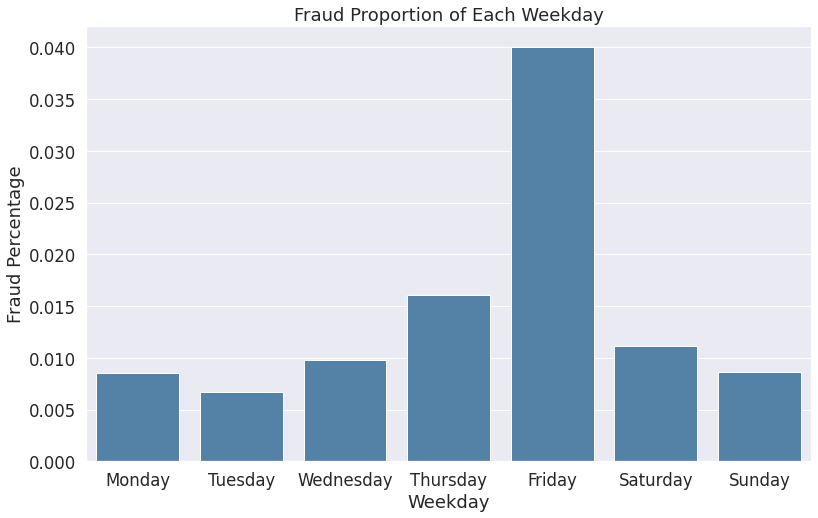

In [29]:
fraud_weekday_df = fraud_weekday_smooth.to_frame(name = "avg_fraud").reset_index()
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
plt.rcParams["figure.figsize"] = [13,8]
sns.set(font_scale=1.5)
plot = sns.barplot(x='weekday', y='avg_fraud', data = fraud_weekday_df, order = weekday_order, color = "steelblue") 
plt.title("Fraud Proportion of Each Weekday")
plt.ylabel("Fraud Percentage")
plt.xlabel("Weekday")

In [30]:
# likelihood of fraud for that state
c = 4
nmid = 15
fraud_avg = final_target_encode['Fraud'].mean()
fraud_state_avg = final_target_encode.groupby("Merch state")['Fraud'].mean()
fraud_state_num = final_target_encode.groupby("Merch state").size()
fraud_state_smooth = fraud_avg + (fraud_state_avg-fraud_avg) / (1+np.exp(-(fraud_state_num-nmid)/c))
fraud_state_smooth

Merch state
AB         9.801570e-03
AK         4.051273e-14
AL         3.937008e-03
AR         4.828721e-04
AZ         0.000000e+00
BC         2.738259e-03
CA         1.670792e-02
CO         6.635700e-04
CT         4.279601e-03
DC         2.162401e-02
DE         3.414407e-06
FL         6.439150e-04
GA         8.178844e-04
HI         8.324231e-03
IA         1.101237e-13
ID         5.793976e-16
IL         2.391824e-03
IN         0.000000e+00
KS         1.137656e-03
KY         2.849003e-03
LA         6.679379e-14
MA         2.046385e-03
MB         9.883172e-03
MD         2.081051e-02
ME         3.282744e-10
MI         8.462623e-03
MN         1.503759e-03
MO         5.861665e-04
MS         0.000000e+00
MT         2.098588e-11
NC         8.350731e-04
ND         1.118649e-04
NE         0.000000e+00
NH         4.983389e-03
NJ         1.847063e-03
NM         1.136364e-02
NS         9.698746e-03
NV         0.000000e+00
NY         2.707581e-02
OH         1.823154e-02
OK         0.000000e+00
ON  

In [33]:
fraud_state_df = fraud_state_smooth.to_frame(name = "avg_fraud").reset_index()
fraud_state_df.sort_values("avg_fraud", ascending = False)

,Merch state,avg_fraud
52,UT,5.679862e-02
42,OR,2.761001e-02
38,NY,2.707581e-02
9,DC,2.162401e-02
23,MD,2.081051e-02
43,PA,1.972556e-02
39,OH,1.823154e-02
6,CA,1.670792e-02
53,VA,1.382668e-02
50,TX,1.373422e-02


Text(0.5, 0, 'Merchant State')

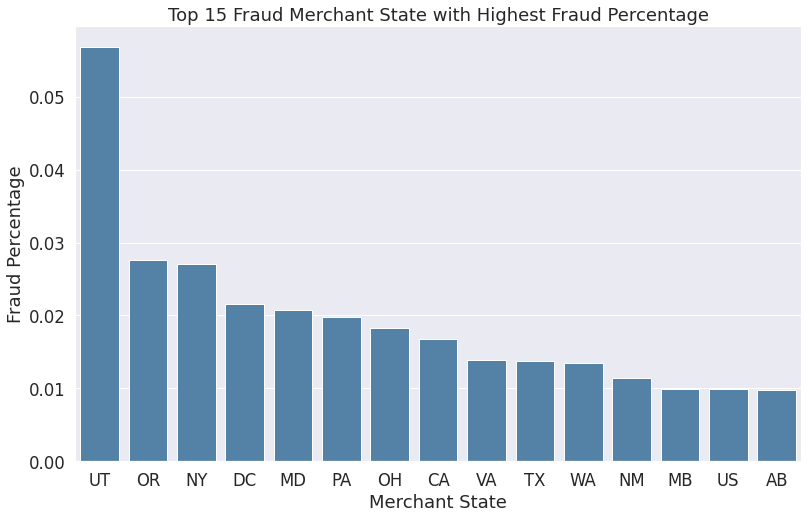

In [32]:
fraud_state_df_top15 = fraud_state_smooth.to_frame(name = "avg_fraud").reset_index().sort_values("avg_fraud", ascending=False).head(15)
plt.rcParams["figure.figsize"] = [13,8]
sns.set(font_scale=1.5)
plot = sns.barplot(x='Merch state', y='avg_fraud', data = fraud_state_df_top15, color = "steelblue") 
plt.title("Top 15 Fraud Merchant State with Highest Fraud Percentage")
plt.ylabel("Fraud Percentage")
plt.xlabel("Merchant State")

In [34]:
fraud_state_df['Merch state'].value_counts().head(15).index

Index(['LA', 'CA', 'NS', 'KS', 'MO', 'IA', 'ME', 'IN', 'VT', 'OR', 'DC', 'RI',
       'QC', 'CT', 'MI'],
      dtype='object')

In [35]:
final["weekday_fraud_encoded"] = final["Date"].dt.day_name().map(fraud_weekday_smooth)
final["state_fraud_encoded"] = final["Merch state"].map(fraud_state_smooth)

In [36]:
final

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,...,card_state_count_0_by_30,card_state_amount_0_by_30,card_state_count_1_by_7,card_state_amount_1_by_7,card_state_count_1_by_14,card_state_amount_1_by_14,card_state_count_1_by_30,card_state_amount_1_by_30,weekday_fraud_encoded,state_fraud_encoded
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,...,0.033333,0.033333,0.142857,0.142857,0.071429,0.071429,0.033333,0.033333,0.040022,0.008747
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0,...,0.033333,0.033333,0.142857,0.142857,0.071429,0.071429,0.033333,0.033333,0.040022,0.002046
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0,...,0.033333,0.033333,0.142857,0.142857,0.071429,0.071429,0.033333,0.033333,0.040022,0.020811
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0,...,0.033333,0.033333,0.142857,0.142857,0.071429,0.071429,0.033333,0.033333,0.040022,0.008747
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,...,0.033333,0.033333,0.142857,0.142857,0.071429,0.071429,0.033333,0.033333,0.040022,0.008747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96392,96749,5142276053,2010-12-31,3500000006160,BEST BUY 00001610,KY,41042.0,P,84.79,0,...,0.033333,0.033333,0.142857,0.142857,0.071429,0.071429,0.033333,0.033333,0.040022,0.002849
96393,96750,5142225701,2010-12-31,8090710030950,MARKUS OFFICE SUPPLIES,OH,45248.0,P,118.75,0,...,0.008333,0.001379,0.071429,0.019142,0.017857,0.002954,0.008333,0.001379,0.040022,0.018232
96394,96751,5142226486,2010-12-31,4503057341100,"TECH PAC, INC",OH,45150.0,P,363.56,0,...,0.016667,0.027833,0.142857,0.142857,0.071429,0.071429,0.033333,0.033333,0.040022,0.018232
96395,96752,5142244619,2010-12-31,8834000695412,BUY.COM,CA,92656.0,P,2202.03,0,...,0.011111,0.026734,0.142857,0.142857,0.071429,0.071429,0.011111,0.026734,0.040022,0.016708


In [37]:
final.shape

(96397, 352)

In [38]:
final_stats = final.describe().T.iloc[3:,:]
final_stats

,count,mean,std,min,25%,50%,75%,max
Cardnum_day_since,96397.0,5.419857,17.187933,0.000000,0.000000,1.000000,5.000000,356.000000
Cardnum_count_0,96397.0,2.473656,6.002116,1.000000,1.000000,1.000000,2.000000,146.000000
Cardnum_avg_0,96397.0,393.557490,726.845846,0.010000,42.835000,160.000000,453.900000,28392.840000
Cardnum_max_0,96397.0,498.205809,1030.957360,0.010000,48.380000,191.930000,563.000000,47900.000000
Cardnum_med_0,96397.0,381.352185,718.729093,0.010000,38.800000,149.650000,427.500000,28392.840000
...,...,...,...,...,...,...,...,...
card_state_amount_1_by_14,96397.0,0.050024,0.026196,0.000005,0.024137,0.071429,0.071429,0.071429
card_state_count_1_by_30,96397.0,0.019486,0.011936,0.000079,0.008333,0.016667,0.033333,0.033333
card_state_amount_1_by_30,96397.0,0.019229,0.013145,0.000001,0.005602,0.019257,0.033333,0.033333
weekday_fraud_encoded,96397.0,0.011121,0.007296,0.006652,0.008550,0.008593,0.011144,0.040022


In [47]:
#final_stats.to_csv("HW5_variables_stats.csv")
#final.to_csv("HW5_final_df")